An overview of clustering principles and techniques, specifically for customer segmentation purposes, for my own enrichment and practice.

In [72]:
#imports
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [357]:
#extract data
df = pd.read_csv('data/clustering_sample_data.csv')

In [358]:
df.describe()

,Property ID,Property ZIP,Year Built,Beds,Baths,Lease Id,Tenant Id,Rent,Income,Verified Income,Insurent2,Score,SF,Market Rent,Actual Rent,# of Children
count,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02,5.410000e+02,541.000000,5.410000e+02,5.410000e+02,541.0,541.000000,541.000000,541.000000,541.000000,541.000000
mean,171034.271719,10533.587800,1241.356747,0.835490,1.117375,2.032824e+07,4.925075e+07,4153.507856,1.661139e+05,9.243819e+04,0.0,-8.585952,711.497227,5387.861072,3650.130776,0.163586
std,18418.350564,592.740142,974.387253,0.875974,0.627748,4.265678e+06,9.883505e+06,2208.392497,2.519364e+05,2.788128e+05,0.0,37.479660,278.109155,2131.442353,2572.822864,0.528402
min,145511.000000,10009.000000,0.000000,0.000000,0.000000,5.375491e+06,2.219924e+07,0.000000,0.000000e+00,0.000000e+00,0.0,-100.000000,415.000000,2025.000000,0.000000,0.000000
25%,156212.000000,10016.000000,0.000000,0.000000,1.000000,1.843671e+07,4.219507e+07,2920.000000,4.800000e+04,0.000000e+00,0.0,3.500000,516.000000,3934.000000,2695.000000,0.000000
50%,162194.000000,10028.000000,1986.000000,1.000000,1.000000,2.194044e+07,5.363559e+07,3500.000000,1.150000e+05,0.000000e+00,0.0,7.600000,657.000000,5250.000000,3350.000000,0.000000
75%,197121.000000,11217.000000,2013.000000,1.000000,1.000000,2.373446e+07,5.782147e+07,4260.000000,1.800000e+05,1.194310e+05,0.0,8.800000,731.000000,6300.000000,3900.000000,0.000000
max,198204.000000,11217.000000,2013.000000,4.000000,3.500000,2.483789e+07,5.985857e+07,16480.000000,2.828493e+06,4.981728e+06,0.0,9.800000,2082.000000,16000.000000,16480.000000,4.000000


In [359]:
df[['Rent','Income','Verified Income','Actual Rent'
    ,'SF','Household Type','Gender','# of Occupants','# of Children']].head(10)

,Rent,Income,Verified Income,Actual Rent,SF,Household Type,Gender,# of Occupants,# of Children
0,2552.0,155000.00,80000.00,2552.0,501,Single,F,1,0.0
1,2880.0,95000.00,105000.00,5000.0,515,Single,F,1,0.0
2,3440.0,109252.78,109252.78,0.0,746,Single,F,1,0.0
3,4675.0,320000.00,200000.00,0.0,986,Single,F,1,0.0
4,2800.0,87000.00,102000.00,2800.0,521,Single,M,1,0.0
5,4655.0,60000.00,54372.00,4655.0,986,Roommates,MF,2,0.0
6,3820.0,260000.00,260000.00,3820.0,696,Couple,MF,2,2.0
7,7000.0,400000.00,279791.00,7000.0,1075,Family,M,3.5,1.5
8,3680.0,115625.00,92500.00,3680.0,725,Couple,MF,2,0.0
9,3330.0,48000.00,48000.00,3330.0,657,Couple,MM,2,0.0


In [360]:
df = df[['Rent','Income','Verified Income','Actual Rent'
    ,'SF','Household Type','Gender','# of Occupants','# of Children']]

In [369]:
#synthetic sampling 
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler


#randomly sample
df2 = df.sample(1000)
df = df.append(df2)

In [370]:
len(df)

2541

In [371]:
# EDA, look at distributions and slice and dice to understand the different types of groups that MAY exist
# look at pairwise relationships

In [372]:
# 'profiling' means to dice into groups, this could be used in combination with K-means
# segmentation is based on similarity scoring and clustering

In [394]:
#data prep and transformations such as scaling

#### for k-means and other algos, scale the numeric columns

#list numerica columns
numeric_columns = ['Rent','Verified Income','# of Occupants','# of Children','SF']

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)

#loop through each numeric column and scale
for col in numeric_columns:
    df[col] = df[col].fillna(0)
    df[col] = df[col].replace('Not Available',0)
    df[col] = df[col].astype(float)
    df[str(col)+'_'] = min_max_scaler.fit_transform(df[col])    

C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a sing

In [395]:
df.head()

,Rent,Income,Verified Income,Actual Rent,SF,Household Type,Gender,# of Occupants,# of Children,Rent_,...,kmeans_cluster_4,kmeans_cluster_5,kmeans_cluster_6,kmeans_cluster_7,kmeans_cluster_8,kmeans_cluster_9,DBSCAN_cluster,Agglomerative_cluster,ward_cluster,SF_
0,2552.0,155000.00,80000.00,2552.0,501.0,Single,F,1.0,0.0,0.154854,...,1,0,5,0,2,0,-1,0,0,0.051590
1,2880.0,95000.00,105000.00,5000.0,515.0,Single,F,1.0,0.0,0.174757,...,1,0,0,5,2,0,0,0,0,0.059988
2,3440.0,109252.78,109252.78,0.0,746.0,Single,F,1.0,0.0,0.208738,...,1,0,0,5,2,0,-1,0,0,0.198560
3,4675.0,320000.00,200000.00,0.0,986.0,Single,F,1.0,0.0,0.283677,...,1,3,0,5,0,7,1,0,0,0.342531
4,2800.0,87000.00,102000.00,2800.0,521.0,Single,M,1.0,0.0,0.169903,...,1,0,0,5,2,0,-1,0,0,0.063587


In [397]:
#transformations and data prep

#fix zero incomes
def income_col(income,verified_income):
    if verified_income > 0:
        return verified_income
    else:
        return income
    
df['Income_2'] = df.apply(lambda row: income_col(row['Income'], row['Verified Income']), axis=1)
df['Income_2_'] = min_max_scaler.fit_transform(df['Income_2'])

#list new numerical columns
numeric_columns = ['Rent_','Income_2_','# of Occupants_','# of Children_','SF_']



C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [398]:
#pick similarity metrics and methods, maybe try several

In [427]:
#k-means with multiple k(s)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

inertia_list = []
silhouette_list = []
k_list = [2,3,4,5,6,7,8,9]

for k in k_list:
    
    #create a model for each K
    cluster = KMeans(n_clusters = k)

    #fit_transform and create a new df for each model
    df['kmeans_cluster_'+str(k)] = cluster.fit_predict(df[numeric_columns])
    
    #compute average silhouette score
    silhouette_list.append(silhouette_score(df[numeric_columns], df['kmeans_cluster_'+str(k)]))
    
    #compute inertia for each fitting
    inertia_list.append(cluster.inertia_)

[9.21954446 6.96718453 6.35160007 6.25167943 6.86282787 7.53782327
 8.33083161 9.21954446]


C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

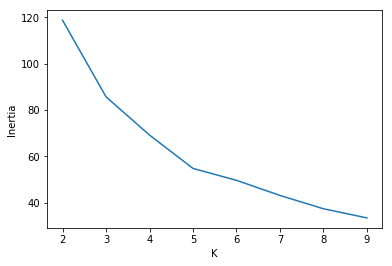

In [400]:
#plot the line graph
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(2, 9), copy=True)
scaled_inertia = min_max_scaler.fit_transform(inertia_list)
distance_tuples = []
elbow = {}

for x in range(len(k_list)):
        distance_tuples.append((k_list[x],scaled_inertia[x]))

#compute distance to the origin
print(euclidean_distances((0,0),distance_tuples)[0])        
        
plt.plot(k_list,inertia_list)
plt.ylabel('Inertia')
plt.xlabel('K')
plt.show()

In [401]:
#explain what inertia is

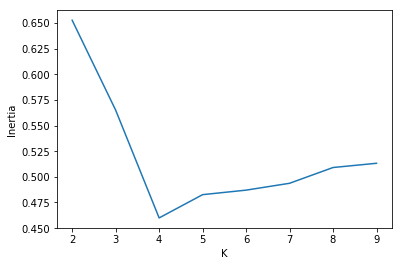

In [402]:
#imputing over the whole group changed inertia a LOT
plt.plot(k_list,silhouette_list)
plt.ylabel('Inertia')
plt.xlabel('K')
plt.show()

In [428]:
#other clustering methods

#DBSCAN
cluster = DBSCAN(min_samples=100)
df['DBSCAN_cluster'] = cluster.fit_predict(df[numeric_columns])

#
cluster = AgglomerativeClustering()
df['Agglomerative_cluster'] = cluster.fit_predict(df[numeric_columns])

#
cluster = AgglomerativeClustering(linkage='ward')
df['ward_cluster'] = cluster.fit_predict(df[numeric_columns])

cluster = MeanShift(min_bin_freq=100)
df['MS_cluster'] = cluster.fit_predict(df[numeric_columns])

cluster = SpectralClustering()
df['Spectral_cluster'] = cluster.fit_predict(df[numeric_columns])

print(numeric_columns)

C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\utils\graph.py:115: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, np.int)


['Rent_', 'Income_2_', '# of Occupants_', '# of Children_', 'SF_']


In [424]:
#explain what silhouette score is

In [429]:
#impute income values, better to do after defining clusters
df_clustered = df.groupby('Spectral_cluster')['Income_2'].mean()

imputed_income_arr = np.array(df_clustered)

#impute zero the values based on the means in each cluster - whew!
for val in df_clustered.index:

    df.loc[df.kmeans_cluster_5 == val, 'Income_2'] = df.loc[df.kmeans_cluster_5 == val]['Income_2'].replace(0,imputed_income_arr[val])

In [430]:
#compute the properties of each cluster

gb = df.groupby(['Spectral_cluster']).agg({
    'Income_2':{'Inc_Mean':lambda x: round(np.mean(x),2)
                       ,'Inc_Median':lambda x: round(np.median(x),2)
                       ,'User_Cnt':'count'},
    'SF':{'SF_Median':'median'},
    'Rent':{'Rent_Median':'median'
            ,'Rent_Mean':lambda x: round(np.mean(x),2)},
    '# of Occupants':{'Occupants_Sum':'sum'},
    'Gender': {'Gender_M':lambda x: x[x=='M'].count()
               ,'Gender_F':lambda x: x[x=='F'].count()
               ,'Gender_MF':lambda x: x[x=='MF'].count()
               ,'Gender_Uniques':lambda x: x.nunique()}, #when there is a tie for mode, it gives the list of values
    'Household Type': {'HT_single':lambda x: x[x=='Single'].count()
                       ,'HT_couple':lambda x: x[x=='Couple'].count()
                       ,'HT_family':lambda x: x[x=='Family'].count()
                       ,'HT_mode':lambda x: x.mode()},
    '# of Children':{'Tot_Children':'sum'
                     ,'Children_Mean':lambda x: round(np.mean(x),2)}
})

#format the figures

#.reset_index() to put clusters in a column

#remove top column names
gb.columns = gb.columns.droplevel()

gb.columns = [''.join(col) for col in gb.columns]

gb.columns
gb

C:\Users\tnelson\AppData\Roaming\Python\Python36\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Inc_Mean,Inc_Median,User_Cnt,SF_Median,Rent_Median,Rent_Mean,Occupants_Sum,Gender_M,Gender_F,Gender_MF,Gender_Uniques,HT_single,HT_couple,HT_family,HT_mode,Tot_Children,Children_Mean
Spectral_cluster,,,,,,,,,,,,,,,,,
0,176327.32,131400.00,840,510.0,2850.0,2932.50,808.0,395,413,0,3,799,3,0,Single,0.0,0.00
1,241529.24,195000.00,431,716.0,3900.0,4499.36,398.0,233,125,0,4,341,0,9,Single,31.0,0.07
2,299303.93,270000.00,124,1075.0,7000.0,7297.70,445.5,121,3,0,2,0,3,121,Family,200.5,1.62
3,164661.11,123713.39,222,1057.0,5740.0,5984.84,510.0,101,37,59,5,7,81,23,Roommates,0.0,0.00
4,131747.45,114000.00,774,657.0,3500.0,3428.55,1557.0,84,93,548,5,5,626,19,Couple,4.0,0.01
5,232715.96,100000.00,72,971.0,5330.0,4923.29,113.0,5,23,44,3,24,27,17,Couple,96.0,1.33
6,3187764.48,2828493.00,21,1062.0,7400.0,7830.00,37.0,11,0,10,2,5,16,0,Couple,7.0,0.33
7,492788.15,450000.00,57,1882.0,14000.0,13547.72,167.0,38,14,5,3,6,5,46,Family,83.0,1.46


In [ ]:
#look at pairwise results of the clusters

In [ ]:
#select clustering method

In [4]:
#evaluate fit and results, silhouette score and inertia, use elbow plot heuristic

In [ ]:
#publish final results, maybe use PCA to show the clusters or ggplot for each dim by dim